## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks are a type of neural network architecture that is particularly effective for processing and understanding visual data, such as images and videos. CNNs are inspired by the structure of the human visual cortex and have several key characteristics that make them well-suited for image recognition and classification tasks.

### Convolutional Layer

The key component of a CNN is the convolutional layer, which operates on the input image in a spatially-aware manner.

The convolutional layer has the following properties:

1. **Input Image**: The input to the convolutional layer is a 3D volume, typically represented as a $32 \times 32 \times 3$ image.

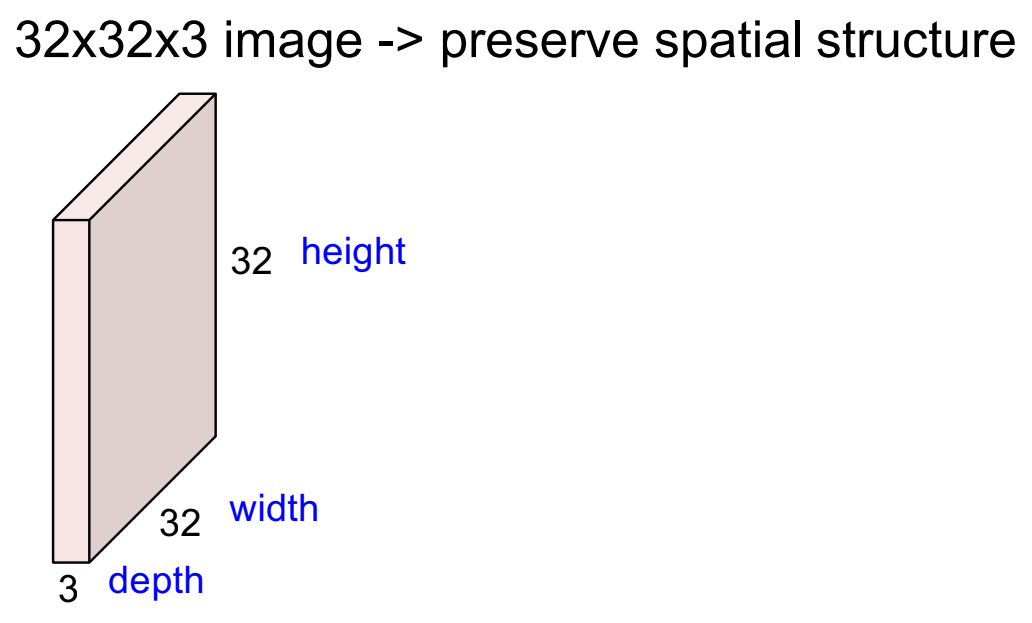

2. **Filters**: The convolutional layer applies a set of learnable filters (or kernels) to the input image. Each filter is typically a small $5 \times 5 \times 3$ matrix.

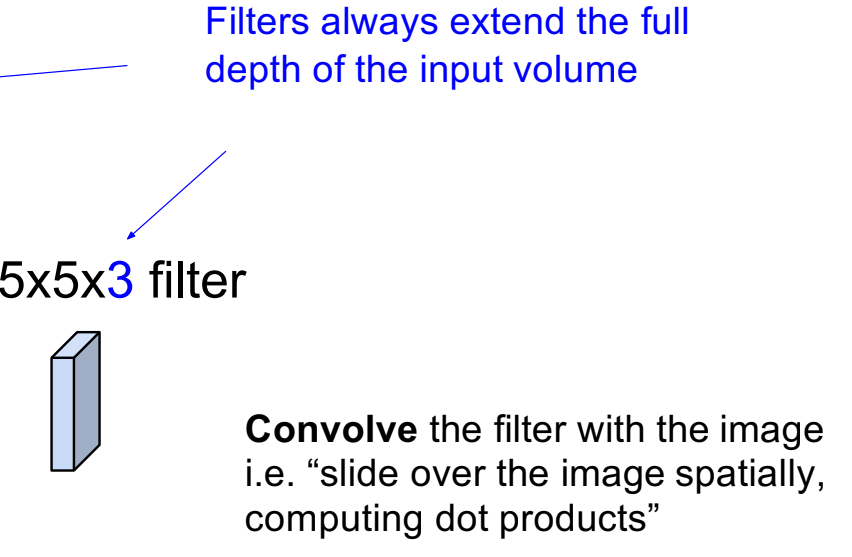

3. **Convolution Operation**: The convolutional layer performs a convolution operation by sliding each filter across the spatial dimensions (width and height) of the input image, computing the dot product between the filter and the input at each position. This produces an activation map, which is a 2D array of values.

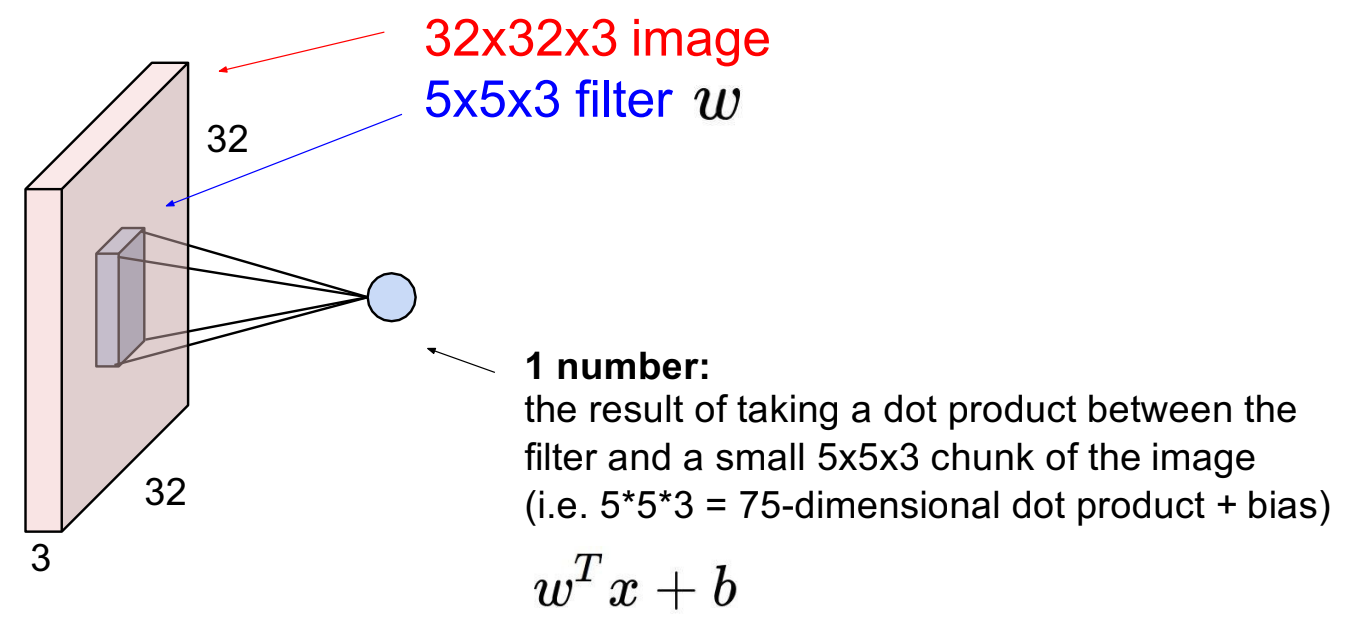

4. **Activation Maps**: The convolutional layer applies this convolution operation to multiple filters, resulting in multiple activation maps (one per filter). These activation maps are stacked together to form the output volume of the convolutional layer.

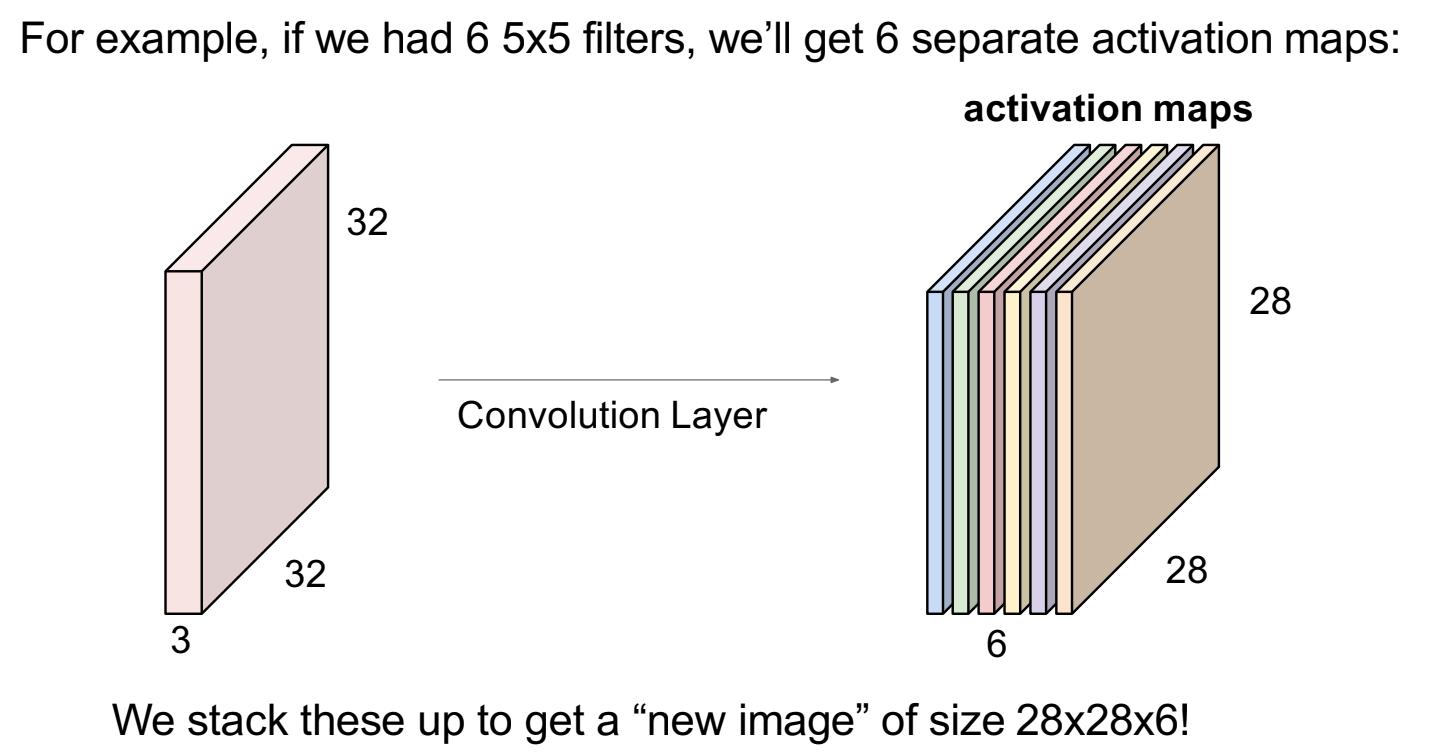

### Pooling Layer

After the convolutional layer, a pooling layer is often used to reduce the spatial dimensions of the activation maps. The pooling layer operates independently on each depth slice of the activation maps, applying a function (such as max pooling) to reduce the spatial size.

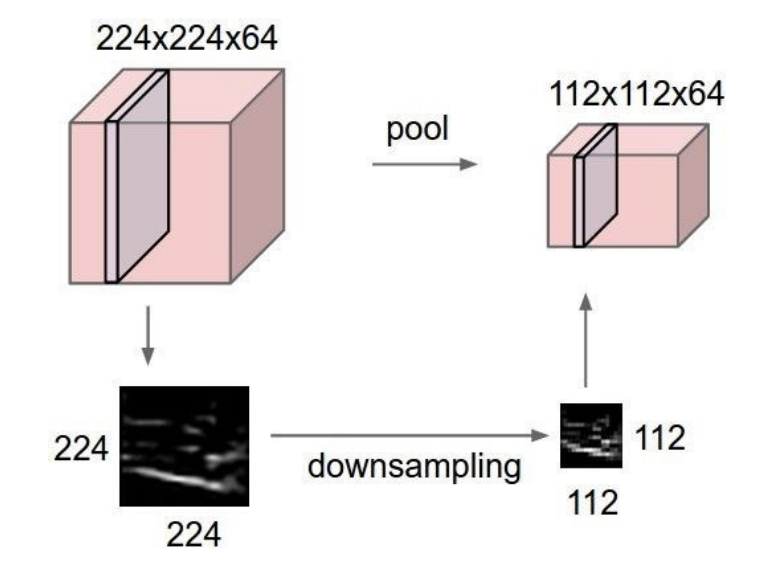

### Fully Connected Layer

The final layers of a CNN are typically fully connected layers, which operate on the flattened output of the previous layers. These fully connected layers perform a traditional neural network operation, computing a weighted sum of the inputs and applying an activation function.

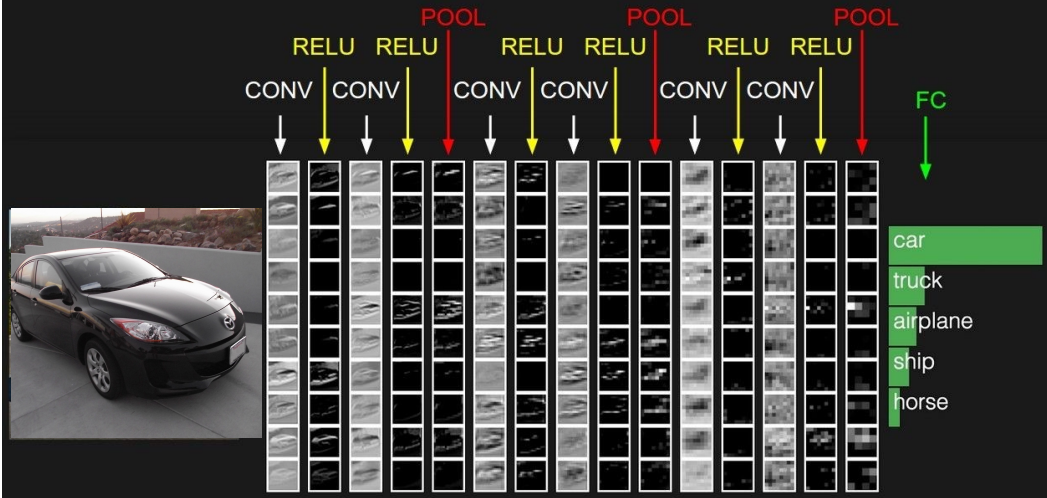

### Convolutional Layer Hyperparameters

The paper outlines the four key hyperparameters of a convolutional layer:

1. **Number of Filters ($K$)**: The number of filters (or kernels) used in the convolutional layer.
2. **Filter Size ($F$)**: The spatial dimensions of the filters, typically a square $F \times F$ filter.
3. **Stride ($S$)**: The step size with which the filters are slid across the input image.
4. **Zero Padding ($P$)**: The amount of zero padding added to the input image, which can be used to control the spatial size of the output.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = load_digits()
X, y = mnist.data, mnist.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to 2D images
X_train = X_train.reshape(-1, 8, 8, 1)
X_test = X_test.reshape(-1, 8, 8, 1)

In [53]:
from CNNFunctions import *
# Sample input volume
input_volume = X_train[:10]  # First 10 samples from the training set

# Sample convolutional filters
conv_filters = [
    np.random.rand(3, 3, 1, 8),  # 8 filters of size 3x3x1
    np.random.rand(3, 3, 8, 16)  # 16 filters of size 3x3x8
]

# Sample fully connected layer weights and bias
fc_weights = np.random.rand(64, 10)
fc_bias = np.zeros((1, 10))

# Run the CNN forward pass
output = cnn_forward(input_volume, conv_filters, fc_weights, fc_bias)
print(output.shape)

Input volume shape: (10, 8, 8, 1)
Filters shape: (3, 3, 1, 8)
Output size: (8, 8, 8)
Max pooling input shape: (10, 8, 8, 8)
Max pooling output size: (10, 4, 4, 8)
Input volume shape: (10, 4, 4, 8)
Filters shape: (3, 3, 8, 16)
Output size: (4, 4, 16)
Max pooling input shape: (10, 4, 4, 16)
Max pooling output size: (10, 2, 2, 16)
Fully connected input shape: (10, 64)
Fully connected weights shape: (64, 10)
Fully connected bias shape: (1, 10)
(10, 10)


Input volume shape: (10, 8, 8, 1)
Filters shape: (3, 3, 1, 8)
Output size: (8, 8, 8)
Max pooling input shape: (10, 8, 8, 8)
Max pooling output size: (10, 4, 4, 8)


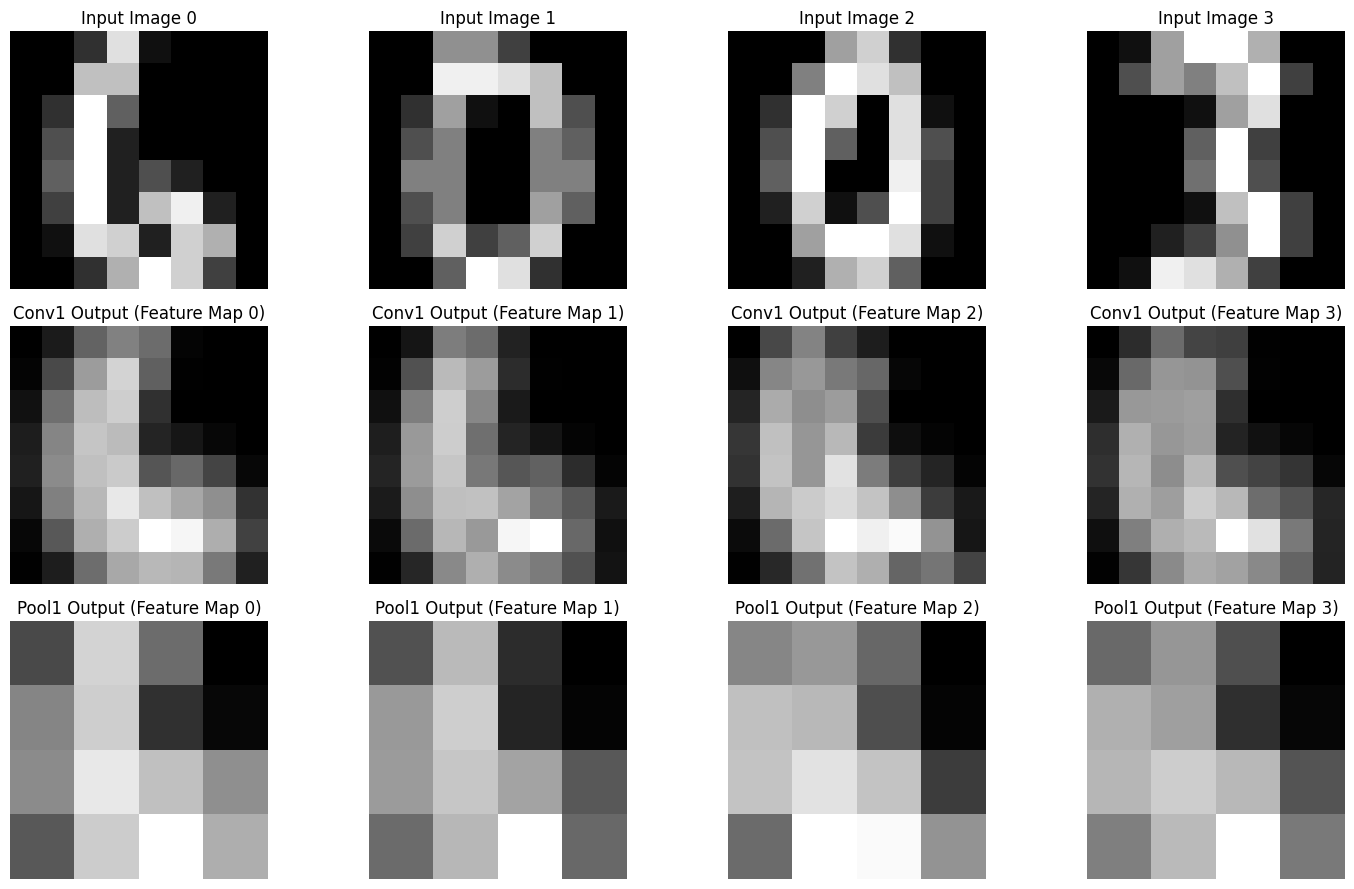

In [43]:
import math

# Convolutional layers
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 9))

# Plot the input volume
for i, ax in enumerate(axes[0]):
    if i < len(input_volume):
        ax.imshow(input_volume[i, :, :, 0], cmap='gray')
        ax.set_title(f'Input Image {i}')
    ax.axis('off')

# Plot the first convolutional layer output
conv_output = convolve(input_volume, conv_filters[0], stride=1, padding=1)
for i, ax in enumerate(axes[1]):
    if i < conv_output.shape[3]:
        ax.imshow(conv_output[0, :, :, i], cmap='gray')
        ax.set_title(f'Conv1 Output (Feature Map {i})')
    ax.axis('off')

# Plot the first max pooling layer output
pool_output = max_pool(relu(conv_output), pool_size=2, stride=2)
for i, ax in enumerate(axes[2]):
    if i < pool_output.shape[3]:
        ax.imshow(pool_output[0, :, :, i], cmap='gray')
        ax.set_title(f'Pool1 Output (Feature Map {i})')
    ax.axis('off')

plt.tight_layout()
plt.show()